<a href="https://colab.research.google.com/github/Bhagya028/Web-development-/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition

Goal : Identify Handwritten Digits

Description : Images of handwritten digits are uploaded from tensorflow MNIST dataset and using Neural network model we identify the digits.

# Import Libraries

In [1]:
# Store data and data manipuation
import numpy as np
# Visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt

# Upload dataset and create model
import tensorflow as tf

# Download data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Data Analysation

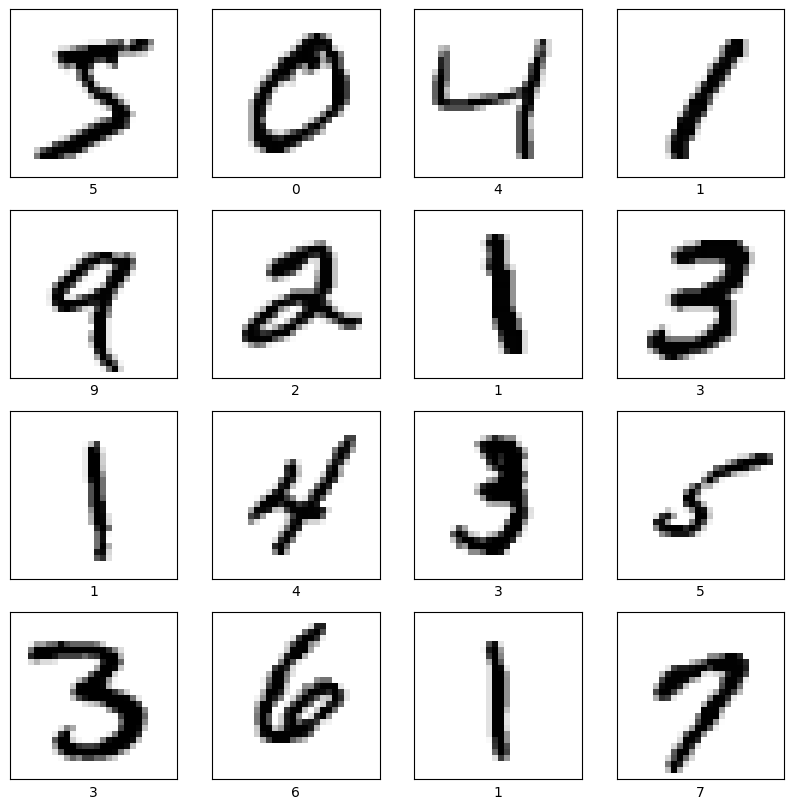

In [3]:
# Visaulize the data
plt.figure(figsize = (10, 10))
for i in range(0,16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap= 'binary')
  plt.xlabel(str(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
# Dataset information
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Normalize data
x_train = np.reshape(x_train, (60000, 28 *28))
x_test = np.reshape(x_test, (10000, 28 *28))
x_train = x_train / 255
x_test = x_test / 255

# Neural Network Model

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),  # if input is flattened
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [16]:
# Compile the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Fit the Model
_= model.fit(x= x_train, y=y_train, validation_data=(x_test, y_test),
             batch_size=1024, epochs=30, verbose=2)

Epoch 1/30
59/59 - 45s - 763ms/step - accuracy: 0.8140 - loss: 0.7129 - val_accuracy: 0.9429 - val_loss: 0.1990
Epoch 2/30
59/59 - 82s - 1s/step - accuracy: 0.9518 - loss: 0.1600 - val_accuracy: 0.9683 - val_loss: 0.1040
Epoch 3/30
59/59 - 82s - 1s/step - accuracy: 0.9716 - loss: 0.0969 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 4/30
59/59 - 82s - 1s/step - accuracy: 0.9775 - loss: 0.0747 - val_accuracy: 0.9828 - val_loss: 0.0586
Epoch 5/30
59/59 - 85s - 1s/step - accuracy: 0.9812 - loss: 0.0629 - val_accuracy: 0.9846 - val_loss: 0.0525
Epoch 6/30
59/59 - 79s - 1s/step - accuracy: 0.9836 - loss: 0.0545 - val_accuracy: 0.9836 - val_loss: 0.0487
Epoch 7/30
59/59 - 81s - 1s/step - accuracy: 0.9852 - loss: 0.0493 - val_accuracy: 0.9840 - val_loss: 0.0483
Epoch 8/30
59/59 - 83s - 1s/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9879 - val_loss: 0.0381
Epoch 9/30
59/59 - 81s - 1s/step - accuracy: 0.9882 - loss: 0.0391 - val_accuracy: 0.9878 - val_loss: 0.0370
Epoch 10/30
59/5

30 epoches


# Result

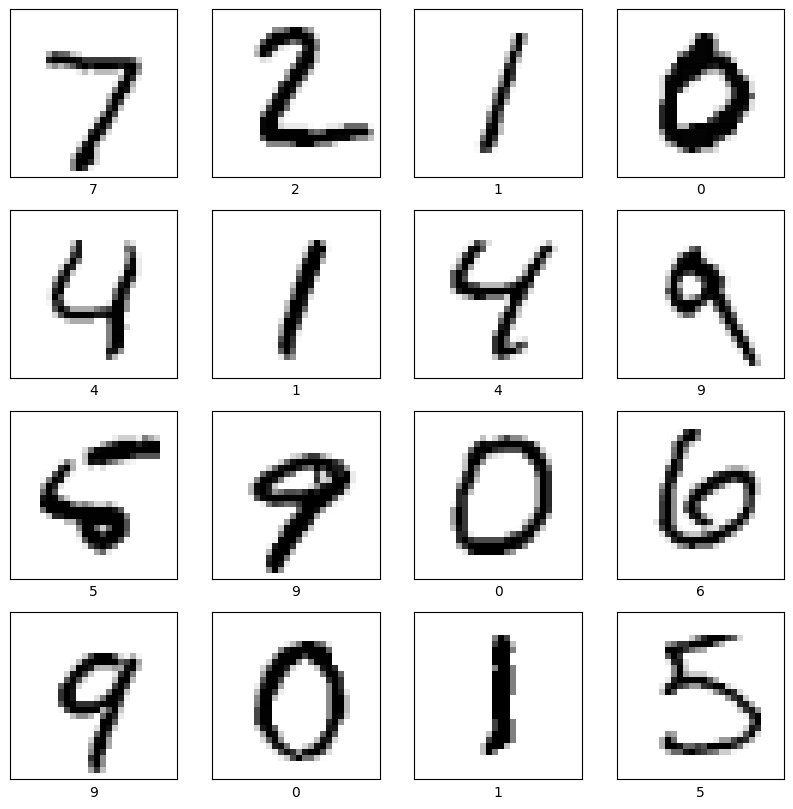

In [9]:
#Plot the result
plt.figure(figsize = (10, 10))
for i in range(0,16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_test[i].reshape([28,28]), cmap= 'binary')
  plt.xlabel(str(y_test[i]))
  plt.xticks([])
  plt.yticks([])

# Accuracy

In [10]:
loss,accuracy = model.evaluate(x_test, y_test)
print("Accuracy = ", accuracy * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9407 - loss: 0.2050
Accuracy =  94.8199987411499
